In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('/Users/didyvanbelkom/Documents/02 MSc DSS/THESIS CODE/Jupiter Notebook/df_complete.xlsx')

In [3]:
df.head()

,Unnamed: 0,Customer_ID,recency,frequency,monetary,TotalPrice,Top_10%_spend
0,0,12346,0.439678,0.049020,0.001059,77183.60,1
1,1,12347,0.005362,0.004902,0.003782,4310.00,1
2,2,12348,0.195710,0.000000,0.000628,1797.24,0
3,3,12349,0.112601,0.009804,0.007642,1757.55,0
4,4,12352,0.026810,0.004902,0.000976,2506.04,0


In [4]:
df.drop(columns=['Unnamed: 0'])

,Customer_ID,recency,frequency,monetary,TotalPrice,Top_10%_spend
0,12346,0.439678,0.049020,0.001059,77183.60,1
1,12347,0.005362,0.004902,0.003782,4310.00,1
2,12348,0.195710,0.000000,0.000628,1797.24,0
3,12349,0.112601,0.009804,0.007642,1757.55,0
4,12352,0.026810,0.004902,0.000976,2506.04,0
...,...,...,...,...,...,...
2767,18278,0.104558,0.000000,0.000680,173.90,0
2768,18280,0.077748,0.000000,0.000872,180.60,0
2769,18281,0.568365,0.000000,0.000336,80.82,0
2770,18283,0.045576,0.024510,0.001830,2094.88,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [6]:
km = KMeans(n_clusters = 2)
km

KMeans(n_clusters=2)

In [7]:
np.random.seed(123)

In [8]:
y_predicted = km.fit_predict(df[['recency', 'frequency', 'monetary']])
y_predicted

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [9]:
df['cluster'] = y_predicted
df.head()

,Unnamed: 0,Customer_ID,recency,frequency,monetary,TotalPrice,Top_10%_spend,cluster
0,0,12346,0.439678,0.049020,0.001059,77183.60,1,1
1,1,12347,0.005362,0.004902,0.003782,4310.00,1,0
2,2,12348,0.195710,0.000000,0.000628,1797.24,0,0
3,3,12349,0.112601,0.009804,0.007642,1757.55,0,0
4,4,12352,0.026810,0.004902,0.000976,2506.04,0,0


In [10]:
df.value_counts()

Unnamed: 0  Customer_ID  recency   frequency  monetary  TotalPrice  Top_10%_spend  cluster
2771        18287        0.045576  0.014706   0.006710  1837.28     0              0          1
919         14403        0.600536  0.004902   0.001151  1475.81     0              1          1
927         14415        0.037534  0.044118   0.017724  5900.28     1              0          1
926         14414        0.024129  0.000000   0.002576  1496.98     0              0          1
925         14413        0.120643  0.009804   0.001846  122.70      0              0          1
                                                                                             ..
1847        16325        0.158177  0.039216   0.008593  594.24      0              0          1
1846        16323        0.568365  0.000000   0.000410  207.50      0              1          1
1845        16321        0.699732  0.004902   0.000653  373.65      0              1          1
1844        16320        0.235925  0.014706  

In [11]:
test = df.groupby(['cluster', 'Top_10%_spend']).count()

In [12]:
print(test['Customer_ID'])

cluster  Top_10%_spend
0        0                1978
         1                 372
1        0                 412
         1                  10
Name: Customer_ID, dtype: int64


In [13]:
df_test = df.loc[df['cluster'] == 0]

In [14]:
df_test.describe()

,Unnamed: 0,Customer_ID,recency,frequency,monetary,TotalPrice,Top_10%_spend,cluster
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.0
mean,1385.865957,15345.658723,0.089620,0.026719,0.009051,2881.088767,0.158298,0.0
std,798.210509,1698.826810,0.080322,0.051255,0.034039,11320.140344,0.365098,0.0
min,1.000000,12347.000000,0.000000,0.000000,0.000061,15.000000,0.000000,0.0
25%,699.250000,13890.500000,0.024129,0.004902,0.001645,389.835000,0.000000,0.0
50%,1388.500000,15352.000000,0.064343,0.014706,0.003734,980.910000,0.000000,0.0
75%,2074.750000,16816.250000,0.142091,0.029412,0.007766,2401.335000,0.000000,0.0
max,2771.000000,18287.000000,0.329759,1.000000,1.000000,280206.020000,1.000000,0.0


In [15]:
df_test = df_test.drop(columns=['Unnamed: 0', 'Customer_ID', 'TotalPrice', 'cluster'])

In [16]:
df_test.head()

,recency,frequency,monetary,Top_10%_spend
1,0.005362,0.004902,0.003782,1
2,0.195710,0.000000,0.000628,0
3,0.112601,0.009804,0.007642,0
4,0.026810,0.004902,0.000976,0
5,0.115282,0.000000,0.000902,0


In [17]:
df_test['Top_10%_spend'].value_counts()

0    1978
1     372
Name: Top_10%_spend, dtype: int64

In [18]:
X = df_test.drop(columns = ['Top_10%_spend'])
y = df_test['Top_10%_spend']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [20]:
print('The number of records in the training dataset is', X_train.shape[0])

The number of records in the training dataset is 1645


In [21]:
#Logistic Regression not using oversampling

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=123)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=123)

In [23]:
y_pred = logreg.predict(X_test)

In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[590,   0],
       [108,   7]])

/Users/didyvanbelkom/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


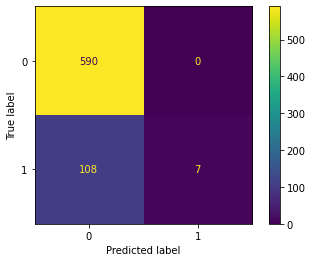

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test) 

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8468085106382979
Precision: 1.0
Recall: 0.06086956521739131


In [27]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

0.8287693441414886


In [28]:
f1_lr = metrics.f1_score(y_test, y_pred)
print(f1_lr)

0.11475409836065573


In [29]:
#Logistic Regression using oversampling

In [30]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [31]:
ros = RandomOverSampler(random_state=123)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

In [32]:
from collections import Counter
print(sorted(Counter(y_train_ros).items()))

[(0, 1388), (1, 1388)]


In [33]:
logreg2 = LogisticRegression(random_state=123)
test_model = logreg2.fit(X_train_ros, y_train_ros)
log_prediction = test_model.predict(X_test)

In [34]:
cnf_matrix = metrics.confusion_matrix(y_test, log_prediction)
cnf_matrix

array([[497,  93],
       [ 32,  83]])

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, log_prediction))
print("Precision:",metrics.precision_score(y_test, log_prediction))
print("Recall:",metrics.recall_score(y_test, log_prediction))

Accuracy: 0.8226950354609929
Precision: 0.4715909090909091
Recall: 0.7217391304347827


In [44]:
y_pred_proba2 = test_model.predict_proba(X_test)[::,1]
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

In [45]:
print(auc2)

0.8524539425202653


In [46]:
f1_lr2 = metrics.f1_score(y_test, log_prediction)
print(f1_lr2)

0.5704467353951891
